In [1]:
## Neccessaty imports

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
## Random Files picked up from training batch files

df = pd.concat(map(pd.read_csv, ['apsfailure_20211224_133055.csv', 'apsfailure_20211224_133105.csv',"apsfailure_20211224_133116.csv"]), ignore_index=True)


In [3]:
df.head()


class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [4]:
df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [5]:
df.shape

(9000, 171)

In [6]:
df.replace("na",np.NaN,inplace=True)

In [7]:
df.isnull().sum()

class        0
aa_000       0
ab_000    6980
ac_000     546
ad_000    2238
          ... 
ee_007     118
ee_008     118
ee_009     118
ef_000     452
eg_000     452
Length: 171, dtype: int64

In [8]:
## removing the columns if percentage of the missing values is more than 60

df = df[df.columns[df.isnull().mean() < 0.6]]

In [9]:
df

class   aa_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001   ag_002  \
0      neg    76698  2130706438    280      0      0      0      0        0   
1      neg    33058           0    NaN      0      0      0      0        0   
2      neg    41040         228    100      0      0      0      0        0   
3      neg       12          70     66      0     10      0      0        0   
4      neg    60874        1368    458      0      0      0      0        0   
...    ...      ...         ...    ...    ...    ...    ...    ...      ...   
8995   neg    41416           0    NaN      0      0      0      0        0   
8996   neg    89088         508    464      0      0      0      0        0   
8997   neg    38424         400    400      0      0      0      0        0   
8998   neg    39264         144    128      0      0      0      0        0   
8999   pos  1421456         NaN    NaN    NaN    NaN      0  66280  2018548   

        ag_003  ...    ee_002   ee_003    ee_004    ee_005    ee_006  ee_007  \
0            0  ...   1240520   493384    721044    469792    339156  157956   
1            0  ...    421400   178064    293306    245416    133654   81140   
2            0  ...    277378   159812    423992    409564    320746  158022   
3          318  ...       240       46        58        44        10       0   
4            0  ...    622012   229790    405298    347188    286954  311560   
...        ...  ...       ...      ...       ...       ...       ...     ...   
8995         0  ...    422472   207522    361168    227470    180282  128568   
8996         0  ...    678562   327862    654234    607134    549830  499626   
8997         0  ...    625568   326410    799880    108002       718     158   
8998         0  ...    425660   253460    557720    390290    186206   55506   
8999  16136798  ...  14662460  5982850  12909536  13953028  16689188  744782   

      ee_008 ee_009 ef_000 eg_000  
0      73224      0      0      0  
1      97576   1500      0      0  
2      95128    514      0      0  
3          0      0      4     32  
4     433954   1218      0      0  
...      ...    ...    ...    ...  
8995  274182  36306      0      0  
8996  573806  15530      0      0  
8997      62      0      0      0  
8998    4822      0      0      0  
8999  169808      0    NaN    NaN  

[9000 rows x 163 columns]

In [10]:
## replacing neg with 0 and pos with 1 

df["class"] = df["class"].map({"neg":0,"pos":1})

In [11]:
df.dtypes

class      int64
aa_000     int64
ac_000    object
ad_000    object
ae_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 163, dtype: object

In [12]:
df = df.apply(pd.to_numeric)

In [13]:
df.dtypes

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 163, dtype: object

In [14]:
## replacing the missing values in column with mean values

[df[col].replace(np.NaN,df[col].mean(),inplace=True) for col in df.columns]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [15]:
df.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 163, dtype: int64

In [16]:
df_des = df.describe()

cols_to_drop = [x for x in df.columns if df_des[x]["std"]==0]

In [17]:
cols_to_drop

['cd_000']

In [18]:
df.describe()

class        aa_000        ac_000        ad_000        ae_000  \
count  9000.000000  9.000000e+03  9.000000e+03   9000.000000   9000.000000   
mean      0.019222  6.102888e+04  3.601588e+08    450.944099      7.972067   
std       0.137313  1.468623e+05  7.739886e+08   1344.498374    152.211441   
min       0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%       0.000000  9.180000e+02  2.000000e+01     44.000000      0.000000   
50%       0.000000  3.094500e+04  2.010000e+02    304.000000      0.000000   
75%       0.000000  4.838700e+04  2.041500e+03    450.944099      0.000000   
max       1.000000  1.793716e+06  2.130707e+09  80024.000000  12048.000000   

             af_000        ag_000         ag_001        ag_002        ag_003  \
count   9000.000000  9.000000e+03    9000.000000  9.000000e+03  9.000000e+03   
mean      12.744181  5.722607e+02     760.975796  9.080717e+03  8.631455e+04   
std      193.044596  3.692449e+04   14390.524153  1.383377e+05  6.866525e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
50%        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
75%        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
max    11368.000000  3.376892e+06  618212.000000  7.771682e+06  2.249034e+07   

       ...        ee_002        ee_003        ee_004        ee_005  \
count  ...  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03   
mean   ...  4.647997e+05  2.195504e+05  4.600926e+05  4.045567e+05   
std    ...  1.198283e+06  5.494684e+05  1.157236e+06  1.126388e+06   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  3.302000e+03  1.326000e+03  3.220000e+03  4.501500e+03   
50%    ...  2.432670e+05  1.156600e+05  2.322050e+05  2.001550e+05   
75%    ...  4.491130e+05  2.195504e+05  4.631310e+05  4.045567e+05   
max    ...  2.376624e+07  1.063883e+07  2.700915e+07  3.225021e+07   

             ee_006        ee_007        ee_008         ee_009       ef_000  \
count  9.000000e+03  9.000000e+03  9.000000e+03    9000.000000  9000.000000   
mean   3.281371e+05  3.318311e+05  1.375077e+05    7502.383697     0.050772   
std    9.541583e+05  1.581108e+06  4.119229e+05   29405.491744     1.912811   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000     0.000000   
25%    6.675000e+02  1.280000e+02  0.000000e+00       0.000000     0.000000   
50%    1.087300e+05  4.652100e+04  5.386000e+03       0.000000     0.000000   
75%    2.875805e+05  1.742290e+05  1.375077e+05    2562.500000     0.000000   
max    2.061483e+07  4.382968e+07  1.095246e+07  727152.000000   134.000000   

            eg_000  
count  9000.000000  
mean      0.273280  
std      10.184833  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     892.000000  

[8 rows x 163 columns]

In [19]:
df["class"]

0       0
1       0
2       0
3       0
4       0
       ..
8995    0
8996    0
8997    0
8998    0
8999    1
Name: class, Length: 9000, dtype: int64

/home/king/anaconda3/envs/scania/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

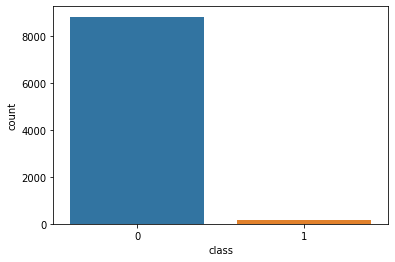

In [20]:
X = df.drop(['class'],axis=1)

y = df["class"]

sns.countplot(y)

In [21]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE()

In [22]:
X_new,y_new = sampler.fit_resample(X,y)

/home/king/anaconda3/envs/scania/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

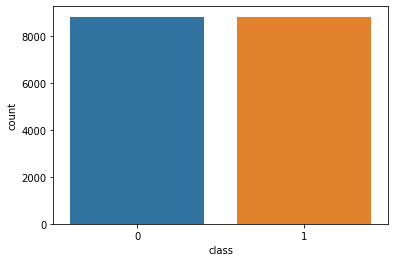

In [23]:
sns.countplot(y_new)

In [24]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_scaled = std_scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns,index=X.index)

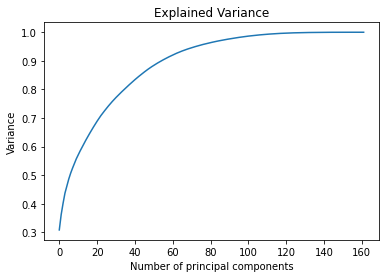

In [25]:
from sklearn.decomposition import PCA

pca = PCA()

pc = pca.fit_transform(X_scaled)

plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("Number of principal components")

plt.ylabel("Variance")

plt.title("Explained Variance")

plt.show()

In [26]:
pca = PCA(n_components=100)

new_df = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_df,index=X_scaled.index)

principal_x

0          1          2          3         4         5   \
0      2.171928  -1.096814   1.239060  -1.061715  0.570751 -0.255035   
1     -0.713646  -0.540498   0.048680  -0.128330  0.098816 -0.066428   
2     -1.372648  -0.187551  -0.353385  -0.015552  0.159679 -0.203576   
3     -3.327869   0.141245  -0.544784   0.499820  0.100225  0.399554   
4      0.168774  -0.102613   0.430799  -0.817330 -0.117836 -0.189869   
...         ...        ...        ...        ...       ...       ...   
8995  -0.765350  -0.930048   0.135036  -0.515140  0.563215 -0.479658   
8996   1.060874  -0.353818   0.595372  -0.804753  0.245824 -1.093457   
8997  -0.549454  -0.501551   0.381020  -0.478083  0.066120 -0.080000   
8998  -1.226329  -0.139369  -0.303747  -0.110398  0.076078 -0.168426   
8999  85.265466  15.859768 -36.817258  29.916460  1.326683 -8.381504   

            6          7         8         9   ...        90        91  \
0    -0.530929   0.412982 -0.912599 -0.273539  ...  0.513342 -0.388107   
1     0.244377   0.083062  0.112537 -0.102511  ... -0.132711 -0.279255   
2    -0.122389  -0.270068  0.425064  0.010371  ... -0.046610 -0.013646   
3     0.765730   0.084902  0.939185  2.821664  ... -1.052328  0.612153   
4    -0.555020  -0.056333 -1.203306 -0.231888  ... -0.213016 -0.159979   
...        ...        ...       ...       ...  ...       ...       ...   
8995 -0.114510   0.151706  0.131168 -0.202789  ...  0.190835 -0.126641   
8996 -1.181353  -0.528190 -1.616812 -0.295697  ... -0.090967 -0.310831   
8997 -0.330028   0.261983 -1.004166 -0.268404  ... -0.210251 -0.094327   
8998 -0.237684  -0.208265 -0.085661 -0.042154  ...  0.022729  0.001021   
8999  1.005323  13.800531 -0.153250  1.567341  ...  2.461415  3.186252   

            92        93        94        95        96        97        98  \
0    -0.097412  0.329002  0.115783 -0.634391  0.906668 -0.036927 -0.017264   
1     0.385295 -0.067636 -0.142220  0.753660  0.462776  0.225489 -0.058061   
2     0.065941  0.005507 -0.025239  0.027596 -0.067694 -0.035054 -0.043496   
3    -0.317093  0.334707 -0.069400 -0.083653  0.323916 -0.043172 -0.016273   
4     0.219434 -0.007222  0.019383 -0.020212  0.034960 -0.077583 -0.195744   
...        ...       ...       ...       ...       ...       ...       ...   
8995 -0.067356 -0.022415  0.180424 -0.216701  0.268634 -0.163177  0.427430   
8996  0.064627  0.214701 -0.396154  0.195101  0.023286 -0.281907 -0.224195   
8997  0.025304 -0.051039 -0.034229  0.054488  0.057942 -0.097466 -0.149614   
8998  0.124437  0.114016 -0.099672  0.154932 -0.001542  0.031703  0.068712   
8999  2.129446  6.566426 -2.528888 -0.455086  0.528282 -4.187660  1.314666   

            99  
0    -0.281997  
1     0.074784  
2     0.012837  
3    -0.160687  
4     0.141426  
...        ...  
8995 -0.047867  
8996  0.015743  
8997 -0.073276  
8998 -0.012835  
8999  1.370054  

[9000 rows x 100 columns]

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.3)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test,y_pred) 

roc = roc_auc_score(y_test,y_pred)

classification_report(y_test,y_pred)

print("Accuray : ",acc)

print("AUC score : ",roc)

print(confusion_matrix(y_test,y_pred))


Accuray :  0.9881481481481481
AUC score :  0.6861842105263158
[[2653    7]
 [  25   15]]


In [32]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()

log_classifier.fit(X_train,y_train)

y_preds = log_classifier.predict(X_test)

acc = accuracy_score(y_test,y_preds)

roc = roc_auc_score(y_test,y_preds)

print("Accuray : ",acc)

print("AUC score : ",roc)

print(confusion_matrix(y_test,y_pred))


Accuray :  0.9862962962962963
AUC score :  0.7468045112781955
[[2653    7]
 [  25   15]]


/home/king/anaconda3/envs/scania/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
from sklearn.svm import SVC

log_classifier = SVC()

log_classifier.fit(X_train,y_train)

y_preds = log_classifier.predict(X_test)

acc = accuracy_score(y_test,y_preds)

roc = roc_auc_score(y_test,y_preds)

print("Accuray : ",acc)

print("AUC score : ",roc)

print(confusion_matrix(y_test,y_pred))


Accuray :  0.9855555555555555
AUC score :  0.5371240601503758
[[2653    7]
 [  25   15]]


In [34]:
from sklearn.ensemble import RandomForestClassifier

log_classifier = RandomForestClassifier()

log_classifier.fit(X_train,y_train)

y_pred = log_classifier.predict(X_test)

acc = accuracy_score(y_test,y_preds)

roc = roc_auc_score(y_test,y_pred)

print(confusion_matrix(y_test,y_pred))

print("Accuray : ",acc)

print("AUC score : ",roc)

[[2649   11]
 [  22   18]]
Accuray :  0.9855555555555555
AUC score :  0.7229323308270676


In [35]:
from sklearn.ensemble import AdaBoostClassifier

log_classifier = AdaBoostClassifier()

log_classifier.fit(X_train,y_train)

y_pred = log_classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)

roc = roc_auc_score(y_test,y_pred)

print("Accuray : ",acc)

print(confusion_matrix(y_test,y_pred))

print("AUC score : ",roc)

Accuray :  0.9851851851851852
[[2642   18]
 [  22   18]]
AUC score :  0.7216165413533834


In [36]:
from xgboost import XGBClassifier

classifier = XGBClassifier(objective='binary:logistic')

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)

roc = roc_auc_score(y_test,y_pred)

print("Accuray : ",acc)

print(confusion_matrix(y_test,y_pred))

print("AUC score : ",roc)

/home/king/anaconda3/envs/scania/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuray :  0.987037037037037
[[2645   15]
 [  20   20]]
AUC score :  0.7471804511278196


In [37]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)

roc = roc_auc_score(y_test,y_pred)

print("Accuray : ",acc)

print(confusion_matrix(y_test,y_pred))

print("AUC score : ",roc)

Accuray :  0.9829629629629629
[[2638   22]
 [  24   16]]
AUC score :  0.6958646616541353
